In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['lines.dashed_pattern'] = [7.0, 7.0]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 18})

(-1, 1)

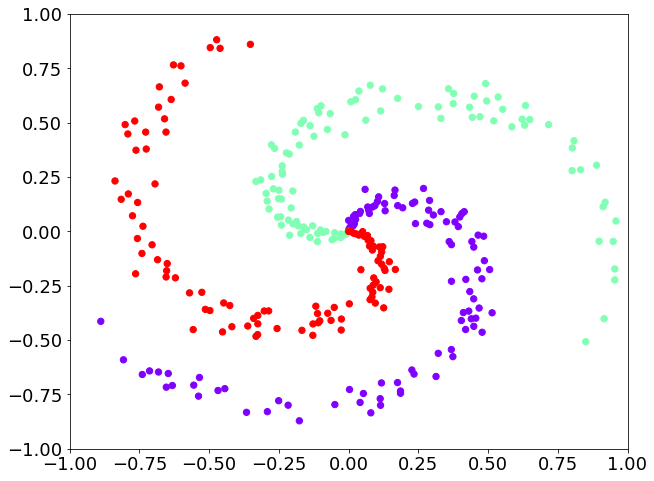

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
k = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  k[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=k, s=40, cmap=plt.cm.rainbow)
colors=('r', 'g', 'b')
plt.xlim([-1,1])
plt.ylim([-1,1])

In [3]:
# Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

num_examples = X.shape[0]

for n in range(201): # gradient descent loop, 300 iterations
  # 1 - output of the single-layer perceptron given the data X
  y_i = np.dot(X, W) + b 
  # compute the class probabilities
  probs = np.exp(y_i) / np.sum(np.exp(y_i), axis=1, keepdims=True)
  # 2 - compute the average cross-entropy cost
  C_ik = -np.log(probs[range(num_examples),k])
  cost = np.sum(C_ik)/num_examples
  
  if n % 20 == 0:
    print ("iteration %d: loss %f" % (n, cost))
  
  # 3 - gradient computation 
  # dC/dyi
  dscores = probs
  dscores[range(num_examples),k] -= 1
  dscores /= num_examples 
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  # 4 - gradient descent update, step size is 1
  W -= dW 
  b -= db

iteration 0: loss 1.096919
iteration 20: loss 0.847970
iteration 40: loss 0.801059
iteration 60: loss 0.786406
iteration 80: loss 0.780613
iteration 100: loss 0.778009
iteration 120: loss 0.776744
iteration 140: loss 0.776097
iteration 160: loss 0.775754
iteration 180: loss 0.775569
iteration 200: loss 0.775466


In [4]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == k)))

training accuracy: 0.49


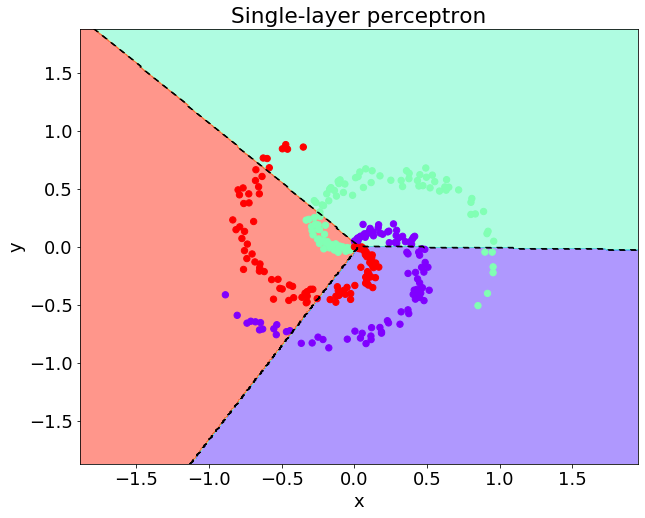

In [5]:
# plot the resulting classifier
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.5)
plt.contour(xx, yy, Z, colors=('k'), linewidths=(0.8), linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], c=k, s=40, cmap=plt.cm.rainbow)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Single-layer perceptron')
fig.savefig('spiral_linear.png')

In [6]:
# initialize parameters randomly
h = 50 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

step_size = 1

# gradient descent loop
num_examples = X.shape[0]
for n in range(3001):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  y_i = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  probs = np.exp(y_i) / np.sum(np.exp(y_i), axis=1, keepdims=True) # [N x K]
  
  # average cross-entropy cost
  C_ik  = -np.log(probs[range(num_examples),k])
  cost = np.sum(C_ik )/num_examples
  if n % 500 == 0:
    print ("iteration %d: loss %f" % (n, cost))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),k] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098509
iteration 500: loss 0.287450
iteration 1000: loss 0.168315
iteration 1500: loss 0.112732
iteration 2000: loss 0.071881
iteration 2500: loss 0.058716
iteration 3000: loss 0.051500


In [7]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == k)))

training accuracy: 0.98


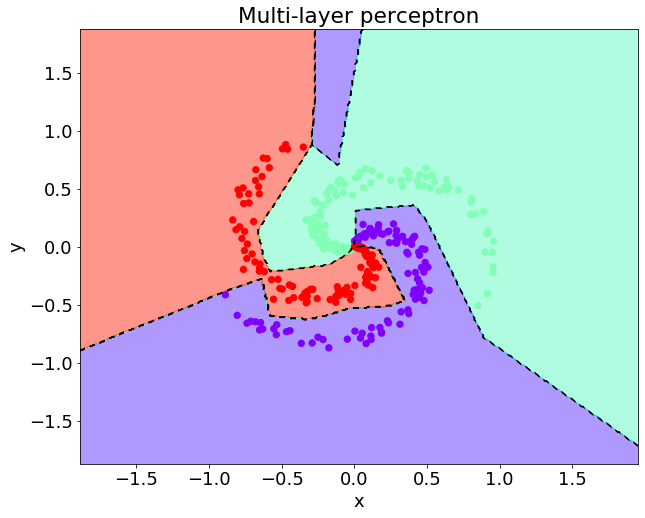

In [8]:
# plot the resulting classifier
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.5)
plt.contour(xx, yy, Z, colors=('k'), linewidths=(0.8), linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], c=k, s=40, cmap=plt.cm.rainbow)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multi-layer perceptron')
fig.savefig('spiral_net.png')
